<h4>Importação das bibliotecas utilizadas</h4>

In [1]:
#Biliotecas utilizadas
#* Manipulação de dados
import pandas as pd
import numpy as np
import openpyxl
#* Dataviz
import matplotlib.pyplot as plt
import seaborn as sns

<h4>Leitura do dataset e manipulação dos dados</h4>

In [2]:
df = pd.read_excel(io = 'bloco_de_codigo/bloco_de_codigo_basededados.xlsx')
df.head()

,Article URL,Nome do artigo,Categoria,Campanha,Data,Visitas Diretas,Novos usuários únicos,Clicks pagos,Tempo de leitura (minutos),Clicks redes sociais,Vezes pesquisados,Visualizações
0,Article_46,Escuta ativa e como isso mudará sua abordagem,Gestão,1047.0,2021-07-21,342016.0,547225.60,0.0,3.245274e+06,889241.60,153907.20,1710122.0
1,Article_58,Observabilidade da ciência de dados para execu...,Data Science,1047.0,2021-08-23,272451.6,435922.56,0.0,1.795001e+06,708374.16,122603.22,1362355.0
2,Article_40,Principais dicas para consolidar sua pilha de ...,Tecnologia,1047.0,2021-07-23,204775.2,327640.32,0.0,2.135547e+06,532415.52,92148.84,1023953.0
3,Article_19,Desbloqueando o acesso aos seus dados,Tecnologia,1047.0,2021-09-10,189002.0,302403.20,0.0,3.167173e+06,491405.20,85050.90,945098.0
4,Article_56,Conselho Executivo Parte 2: CFO,Gestão,1047.0,2021-08-12,147936.0,236697.60,0.0,2.110903e+06,384633.60,66571.20,739694.0


In [3]:
#Dimensões do dataset
df.shape

(14105, 12)

In [4]:
#Informações sobre as variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14105 entries, 0 to 14104
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Article URL                 14104 non-null  object        
 1   Nome do artigo              14104 non-null  object        
 2   Categoria                   14104 non-null  object        
 3   Campanha                    14104 non-null  float64       
 4   Data                        14104 non-null  datetime64[ns]
 5   Visitas Diretas             14104 non-null  float64       
 6   Novos usuários únicos       14104 non-null  float64       
 7   Clicks pagos                14105 non-null  float64       
 8   Tempo de leitura (minutos)  14104 non-null  float64       
 9   Clicks redes sociais        14104 non-null  float64       
 10  Vezes pesquisados           14104 non-null  float64       
 11  Visualizações               14104 non-null  float64   

In [5]:
#Descrição das variáveis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Campanha,14104.0,1047.000000,0.000000,1047.0,1047.000000,1047.000000,1047.000000,1.047000e+03
Visitas Diretas,14104.0,529.194867,5326.747976,0.0,14.400000,40.000000,136.000000,3.420160e+05
Novos usuários únicos,14104.0,846.711787,8522.796761,0.0,23.040000,64.000000,217.600000,5.472256e+05
Clicks pagos,14105.0,42.975603,2655.181173,0.0,0.000000,0.000000,0.000000,3.030854e+05
Tempo de leitura (minutos),14104.0,6921.125408,63844.538740,0.0,277.783912,613.818838,1764.297462,3.245274e+06
Clicks redes sociais,14104.0,1375.906653,13849.544737,0.0,37.440000,104.000000,353.600000,8.892416e+05
Vezes pesquisados,14104.0,238.137690,2397.036589,0.0,6.480000,18.000000,61.200000,1.539072e+05
Visualizações,14104.0,2696.204694,26634.051973,0.0,123.000000,256.000000,732.000000,1.710122e+06


In [6]:
#Variáveis numéricas
df_num = df.select_dtypes('number').columns
df_num

Index(['Campanha', 'Visitas Diretas', 'Novos usuários únicos', 'Clicks pagos',
       'Tempo de leitura (minutos)', 'Clicks redes sociais',
       'Vezes pesquisados', 'Visualizações'],
      dtype='object')

In [7]:
#Soma a quantidade de registros nulos por variável
df.isnull().sum()

Article URL                   1
Nome do artigo                1
Categoria                     1
Campanha                      1
Data                          1
Visitas Diretas               1
Novos usuários únicos         1
Clicks pagos                  0
Tempo de leitura (minutos)    1
Clicks redes sociais          1
Vezes pesquisados             1
Visualizações                 1
dtype: int64

In [8]:
#Mostra a linha onde há registros nulos
df.iloc[14104]

Article URL                         NaN
Nome do artigo                      NaN
Categoria                           NaN
Campanha                            NaN
Data                                NaT
Visitas Diretas                     NaN
Novos usuários únicos               NaN
Clicks pagos                  303085.44
Tempo de leitura (minutos)          NaN
Clicks redes sociais                NaN
Vezes pesquisados                   NaN
Visualizações                       NaN
Name: 14104, dtype: object

In [9]:
#Exclusão de registros nulos
df = df.dropna()
#Soma de registros nulos
df.isnull().sum()

Article URL                   0
Nome do artigo                0
Categoria                     0
Campanha                      0
Data                          0
Visitas Diretas               0
Novos usuários únicos         0
Clicks pagos                  0
Tempo de leitura (minutos)    0
Clicks redes sociais          0
Vezes pesquisados             0
Visualizações                 0
dtype: int64

In [10]:
#Convertendo valores float para integer
df = df.astype(
    {'Campanha' : 'int',
     'Visitas Diretas' : 'int', 
     'Novos usuários únicos' : 'int', 
     'Clicks pagos' : 'int',
     'Tempo de leitura (minutos)' : 'int', 
     'Clicks redes sociais' : 'int',
     'Vezes pesquisados' : 'int', 
     'Visualizações' : 'int'
     })

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14104 entries, 0 to 14103
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Article URL                 14104 non-null  object        
 1   Nome do artigo              14104 non-null  object        
 2   Categoria                   14104 non-null  object        
 3   Campanha                    14104 non-null  int32         
 4   Data                        14104 non-null  datetime64[ns]
 5   Visitas Diretas             14104 non-null  int32         
 6   Novos usuários únicos       14104 non-null  int32         
 7   Clicks pagos                14104 non-null  int32         
 8   Tempo de leitura (minutos)  14104 non-null  int32         
 9   Clicks redes sociais        14104 non-null  int32         
 10  Vezes pesquisados           14104 non-null  int32         
 11  Visualizações               14104 non-null  int32     

In [12]:
#Criando uma coluna com o nome do mês
df['MesNome'] = df['Data'].dt.month_name(locale = 'pt_BR.utf8')

In [13]:
df['Mes'] = df['Data'].dt.month

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14104 entries, 0 to 14103
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Article URL                 14104 non-null  object        
 1   Nome do artigo              14104 non-null  object        
 2   Categoria                   14104 non-null  object        
 3   Campanha                    14104 non-null  int32         
 4   Data                        14104 non-null  datetime64[ns]
 5   Visitas Diretas             14104 non-null  int32         
 6   Novos usuários únicos       14104 non-null  int32         
 7   Clicks pagos                14104 non-null  int32         
 8   Tempo de leitura (minutos)  14104 non-null  int32         
 9   Clicks redes sociais        14104 non-null  int32         
 10  Vezes pesquisados           14104 non-null  int32         
 11  Visualizações               14104 non-null  int32     

In [15]:
df.head()

,Article URL,Nome do artigo,Categoria,Campanha,Data,Visitas Diretas,Novos usuários únicos,Clicks pagos,Tempo de leitura (minutos),Clicks redes sociais,Vezes pesquisados,Visualizações,MesNome,Mes
0,Article_46,Escuta ativa e como isso mudará sua abordagem,Gestão,1047,2021-07-21,342016,547225,0,3245273,889241,153907,1710122,Julho,7
1,Article_58,Observabilidade da ciência de dados para execu...,Data Science,1047,2021-08-23,272451,435922,0,1795001,708374,122603,1362355,Agosto,8
2,Article_40,Principais dicas para consolidar sua pilha de ...,Tecnologia,1047,2021-07-23,204775,327640,0,2135546,532415,92148,1023953,Julho,7
3,Article_19,Desbloqueando o acesso aos seus dados,Tecnologia,1047,2021-09-10,189002,302403,0,3167173,491405,85050,945098,Setembro,9
4,Article_56,Conselho Executivo Parte 2: CFO,Gestão,1047,2021-08-12,147936,236697,0,2110903,384633,66571,739694,Agosto,8


In [16]:
df['MesNome'].describe()

count      14104
unique         6
top       Agosto
freq        2961
Name: MesNome, dtype: object

In [17]:
df_VisitasDiretas = pd.DataFrame(df.groupby(['Mes', 'MesNome'])['Visitas Diretas'].sum())
df_VisitasDiretas

,,Visitas Diretas
Mes,MesNome,
6,Junho,1229518
7,Julho,2115777
8,Agosto,2407944
9,Setembro,956329
10,Outubro,446088
11,Novembro,303664


In [18]:
df.head()

,Article URL,Nome do artigo,Categoria,Campanha,Data,Visitas Diretas,Novos usuários únicos,Clicks pagos,Tempo de leitura (minutos),Clicks redes sociais,Vezes pesquisados,Visualizações,MesNome,Mes
0,Article_46,Escuta ativa e como isso mudará sua abordagem,Gestão,1047,2021-07-21,342016,547225,0,3245273,889241,153907,1710122,Julho,7
1,Article_58,Observabilidade da ciência de dados para execu...,Data Science,1047,2021-08-23,272451,435922,0,1795001,708374,122603,1362355,Agosto,8
2,Article_40,Principais dicas para consolidar sua pilha de ...,Tecnologia,1047,2021-07-23,204775,327640,0,2135546,532415,92148,1023953,Julho,7
3,Article_19,Desbloqueando o acesso aos seus dados,Tecnologia,1047,2021-09-10,189002,302403,0,3167173,491405,85050,945098,Setembro,9
4,Article_56,Conselho Executivo Parte 2: CFO,Gestão,1047,2021-08-12,147936,236697,0,2110903,384633,66571,739694,Agosto,8


<h4>Análise Exploratória dos Dados</h4>

In [19]:
# Definição do Tema do Seaborn
sns.set_theme(
    context = 'paper', style = 'darkgrid', palette = 'muted',
    font = 'sans-serif', font_scale = 1, color_codes = True, 
    rc = None
)

In [20]:
#Total de Visualizações
df['Visualizações'].sum()

38027271

<AxesSubplot: xlabel='Data', ylabel='Visualizações'>

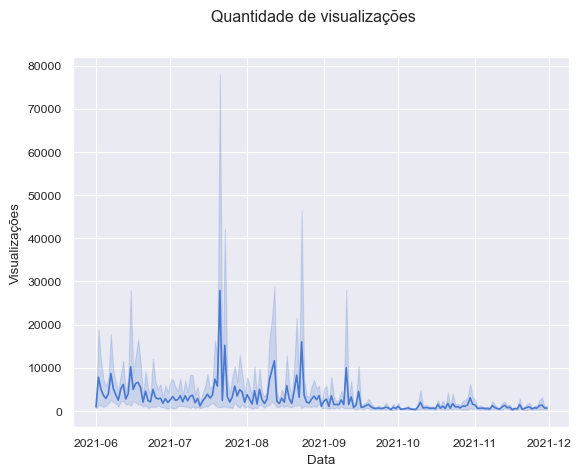

In [22]:
#Título da imagem
plt.suptitle('Quantidade de visualizações')
sns.lineplot(data = df, x = df['Data'], y = df['Visualizações'])